<a href="https://colab.research.google.com/github/niyaudinoor/HackathonNAAN/blob/main/Temperature_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import graphviz
from IPython.display import display, HTML

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split

# Scikit-learn: Regression models
from sklearn.ensemble import RandomForestRegressor

# Scikit-learn: Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz
from sklearn import tree

# 2. Loading the Data into a Pandas DataFrame

Code Block 2A

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 3. Load the CSV File

Code Block 3A

In [ ]:
# Define the path to the CSV file containing water quality data
csv_path = "/content/drive/MyDrive/6. Colab Notebooks/2. Water Quality/TEMP_ water_data_full - Final.csv"

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_path)

df.head()

,Date,Average Temperature C,Average pH,Average Specific Conductance μS/cm,Average Turbidity FNU,Average Dissolved Oxygen mg/l,Average Temperature C +1 day,Average Temperature C +1 week,Average Temperature C +4 weeks
0,2024-05-01,19.8,8.3,1185.3,39.7,9.9,20.0,19.4,24.1
1,2024-05-02,20.0,8.3,1007.0,43.1,9.8,20.9,20.2,23.7
2,2024-05-03,20.9,8.3,864.5,41.4,9.7,19.7,21.3,24.9
3,2024-05-04,19.7,8.1,831.7,37.6,8.7,18.7,22.0,25.8
4,2024-05-05,18.7,8.1,825.8,33.8,9.0,19.1,22.5,25.5


# 4. Preprocessing the Dataset

## 4.1 Separating the Dataset into Inputs and Target

Code Block 4A

In [ ]:
# Drop the 'Date' column and the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the input features DataFrame
inputs = df.drop(['Date', 'Average Temperature C +1 day', 'Average Temperature C +1 week', 'Average Temperature C +4 weeks'], axis='columns')

# Select the target columns ('Average DO (1 day)', 'Average DO (1 week)', 'Average DO (4 weeks)')
# from the DataFrame to create the target DataFrame
target = df[['Average Temperature C +1 day', 'Average Temperature C +1 week', 'Average Temperature C +4 weeks']]

Code Block 4B

In [ ]:
# Convert the inputs DataFrame to a NumPy array with float data type
inputs = np.array(inputs, dtype=float)

# Convert the target DataFrame to a NumPy array with float data type
target = np.array(target, dtype=float)

## 4.2 Splitting the Training and Testing Data

Code Block 4C

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (73, 5)
X_test shape: (19, 5)
y_train shape: (73, 3)
y_test shape: (19, 3)


# 5. Training the Model


Code Block 5A

In [ ]:
# Initialize a RandomForestRegressor model from the scikit-learn library
model = RandomForestRegressor()

Code Block 5B

In [ ]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model.fit(X_train, y_train)

RandomForestRegressor()

Code Block 5C

In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 2)

# Printing the predicted labels
print(rounded_y_pred)

[[27.18 27.17 29.25]
 [20.7  23.89 24.84]
 [28.68 28.53 28.69]
 [29.98 28.38 27.54]
 [20.34 21.23 24.84]
 [24.67 27.08 28.19]
 [27.09 27.1  28.94]
 [29.95 29.11 27.37]
 [21.66 20.35 28.11]
 [27.23 27.51 28.93]
 [29.73 27.69 25.68]
 [27.31 28.94 28.6 ]
 [26.97 26.78 28.41]
 [28.22 29.39 26.74]
 [21.52 19.89 28.02]
 [19.8  22.18 25.77]
 [20.72 22.01 25.92]
 [24.62 27.02 28.16]
 [24.28 28.25 28.13]]


In [ ]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Rounding to 1 decimal place
rounded_y_pred = np.round(y_pred, 2)

# Printing the predicted labels
print(rounded_y_pred)

[[27.18 27.17 29.25]
 [20.7  23.89 24.84]
 [28.68 28.53 28.69]
 [29.98 28.38 27.54]
 [20.34 21.23 24.84]
 [24.67 27.08 28.19]
 [27.09 27.1  28.94]
 [29.95 29.11 27.37]
 [21.66 20.35 28.11]
 [27.23 27.51 28.93]
 [29.73 27.69 25.68]
 [27.31 28.94 28.6 ]
 [26.97 26.78 28.41]
 [28.22 29.39 26.74]
 [21.52 19.89 28.02]
 [19.8  22.18 25.77]
 [20.72 22.01 25.92]
 [24.62 27.02 28.16]
 [24.28 28.25 28.13]]


Code Block 5D

In [ ]:
# Rounding to 1 decimal place
rounded_y_test = np.round(y_test, 2)

print(rounded_y_test)

[[27.8 23.8 30.6]
 [21.8 23.7 24.5]
 [27.8 27.8 30.3]
 [30.  28.5 27.7]
 [20.  19.4 24.1]
 [24.5 25.2 29. ]
 [26.7 24.4 31.1]
 [30.6 29.  28.5]
 [22.5 21.  27.5]
 [25.5 25.4 30.8]
 [30.4 26.5 25.2]
 [28.9 28.7 28.3]
 [26.5 27.9 24.2]
 [28.3 30.  26.5]
 [21.7 19.8 26.7]
 [19.1 22.5 25.5]
 [19.8 22.4 24.4]
 [23.7 27.1 27.8]
 [24.5 27.8 27. ]]


# 6. Feature Importance

Code Block 6A

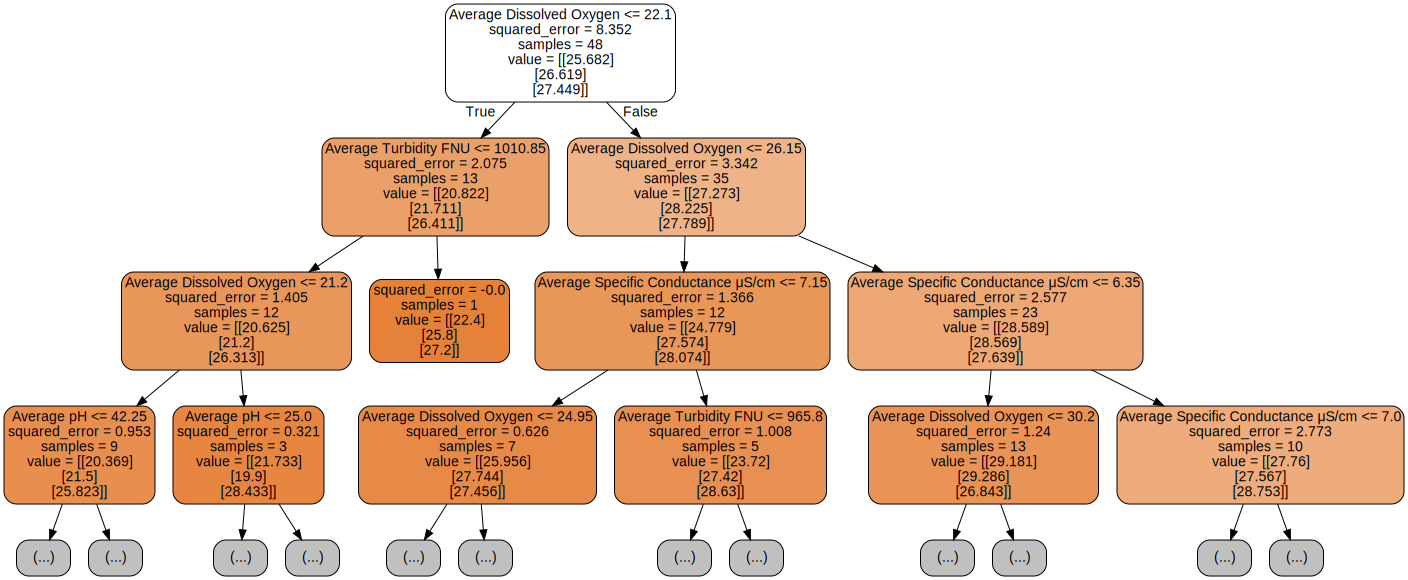

In [ ]:
# TODO: Change this value to view the other decision trees
tree_number = 1

# TODO: Change this value to change the depth of the decision tree
max_depth = 3

tree = model.estimators_[tree_number]

feature_names = ['Average Dissolved Oxygen', 'Average Temperature C',	'Average Turbidity FNU', 'Average pH', 'Average Specific Conductance μS/cm']

dot_data = export_graphviz(tree, feature_names=feature_names, filled=True, rounded=True, max_depth=max_depth)

graph = graphviz.Source(dot_data)
graph.render("water_tree")
graph

Code Block 6B

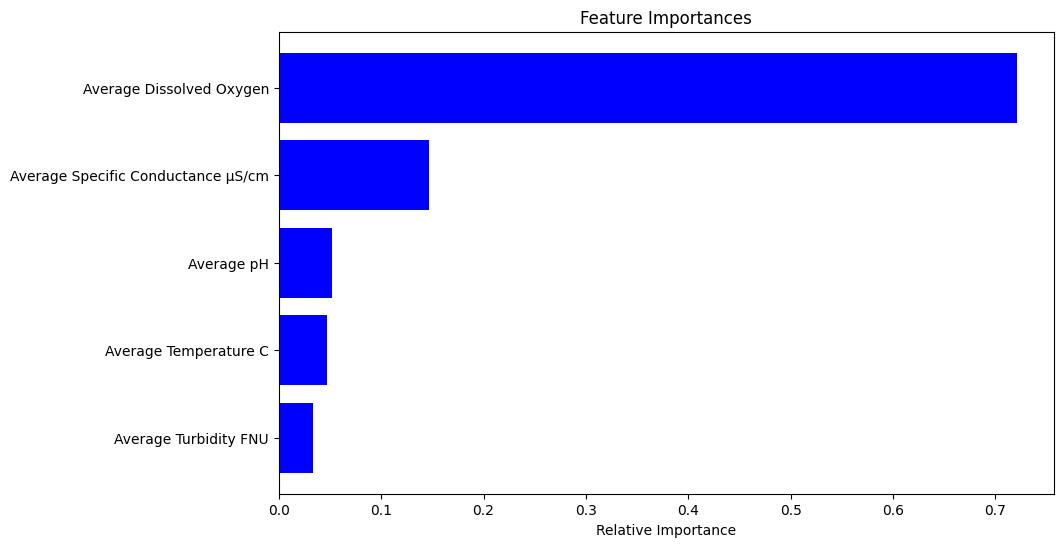

In [ ]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()